In [1]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# EDA >> Feature Selection >> Feature Engineering >> Feature Scaling

In [2]:
## import some basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/ANN_Practice/Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X = dataset.iloc[:, 3:-1]
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [5]:
y = dataset["Exited"]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

## Feature Engineering

### We have categorical variables in the features of this dataset so we are going to OneHotEncode them by using some typical way

In [6]:
geography = pd.get_dummies(X["Geography"], drop_first = True)
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [7]:
gender = pd.get_dummies(X["Gender"], drop_first = True)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


### Concatenate OneHotEncoded Variables into the feature dataset

In [8]:
X = X.drop(["Geography", "Gender"], axis = 1)
X = pd.concat([X, geography, gender], axis = 1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


## Splitting the dataset into Training Set and Testing Set

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## We need to feature scale this dataset as we're gonna classify the result if the customer exits or not... For that we're using ANN and it would use Sigmoid Activation Function which would require the datapoints to reach the Global Minima and so we need to Standardize our data.

In [10]:
from sklearn.preprocessing import StandardScaler  # min-max scaler is used in CNN
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the ANN upon the ready Data

## Sequential - It is a building block of a neural network that provides a linear stack of layers
## Dense - It provides the number of neurons and activation function to be used in a layer
## Dropout - Used to prevent overfitting by eliminating some layers

In [11]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, ReLU, PReLU, ELU
from tensorflow.keras.layers import Dropout

from sklearn.metrics import confusion_matrix, accuracy_score

In [12]:
## initializing the ANN
classifier = Sequential()

In [13]:
## adding input layer
classifier.add(Dense(units = 11, activation = "relu"))  # units = 11 because we have 11 features(columns) to train our model upon

In [14]:
## adding first hidden layer
classifier.add(Dense(units = 6, activation = "relu"))
# classifier.add(Dropout(0.2))

In [15]:
## adding second hidden layer
classifier.add(Dense(units = 7, activation = "relu"))
# classifier.add(Dropout(0.3))

In [16]:
## adding the output layer
classifier.add(Dense(units = 1, activation = "sigmoid"))  # sigmoid because we're dealing with binary classification

## Using the best optimizer: Adam

In [17]:
my_optimizer = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)  # separately defined the optimizer so as to configure the learning rate

In [18]:
classifier.compile(optimizer = my_optimizer, loss = "binary_crossentropy", metrics = ["accuracy"])

## Early Stopping - What should be my number of epochs?

In [19]:
early_stopper = tensorflow.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [20]:
model_history = classifier.fit(X_train, y_train, validation_split = 0.33, batch_size = 10, epochs = 1000, callbacks = early_stopper)

Epoch 1/1000
536/536 [==============================] - 2s 2ms/step - loss: 0.4295 - accuracy: 0.8028 - val_loss: 0.3997 - val_accuracy: 0.8277
Epoch 2/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3783 - accuracy: 0.8440 - val_loss: 0.3793 - val_accuracy: 0.8485
Epoch 3/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3623 - accuracy: 0.8554 - val_loss: 0.3641 - val_accuracy: 0.8519
Epoch 4/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3533 - accuracy: 0.8567 - val_loss: 0.3734 - val_accuracy: 0.8527
Epoch 5/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3476 - accuracy: 0.8582 - val_loss: 0.3720 - val_accuracy: 0.8554
Epoch 6/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3454 - accuracy: 0.8565 - val_loss: 0.3617 - val_accuracy: 0.8501
Epoch 7/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3412 - accuracy: 0.8610 - val_loss: 0.3687 - val_accuracy:

In [21]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

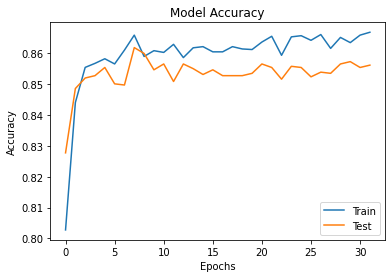

In [22]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])

plt.title("Model Accuracy")

plt.ylabel("Accuracy")
plt.xlabel("Epochs")

plt.legend(["Train", "Test"], loc = "best")

plt.show()

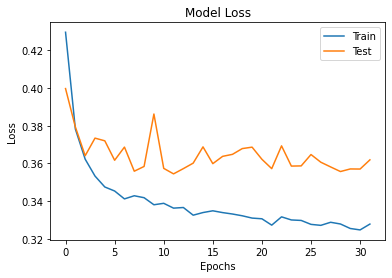

In [23]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])

plt.title("Model Loss")

plt.ylabel("Loss")
plt.xlabel("Epochs")

plt.legend(["Train", "Test"], loc = "best")

plt.show()

# Test the model predictions

In [24]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 972us/step


## Creating the Confusion Matrix for better understanding of model's accuracy

In [25]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1526,   69],
       [ 216,  189]])

In [26]:
score = accuracy_score(y_test, y_pred)
score

0.8575